<br>

# `# Perceptron Trick Coding:`

<br>

In [68]:

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.datasets import make_classification


In [69]:

X,y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10
)




In [70]:
X[0],X.shape

(array([ 0.19924745, -0.11697552]), (100, 2))

In [71]:

plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap="winter",s=100)

In [72]:
X[0]

array([ 0.19924745, -0.11697552])

In [73]:

## adding one in column: (for the bias term)
temp_x = X
temp_x = np.insert(arr=temp_x,obj=0,values=1,axis=1) 
temp_x[0] 

array([ 1.        ,  0.19924745, -0.11697552])

In [74]:
np.ones(X.shape[1])

array([1., 1.])

In [75]:

def step(x):
    return 1 if x>0 else 0

def perceptron(X,y):
    X = np.insert(arr=X,obj=0,values=1,axis=1)
    weights = np.ones(shape=X.shape[1])
    lr = 0.01
    for i in range(1000):
        j = np.random.randint(0,100) # choose number from (0 to 100) because our total row in 100:
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0], weights[1:] # c,a,b (ax+by+c=0)



In [76]:

intercept_,coefficient = perceptron(X,y)


In [77]:
print(intercept_)
print(coefficient)

0.9099999999999999
[1.29897666 0.26510734]


In [78]:

# find value of m,c, ax+by+c = 0, m = -a/b and c = -C/b
m = -coefficient[0]/coefficient[1]
c = -intercept_/coefficient[1]

print(f"slope: {m}")
print(f"c: {c}")



slope: -4.899813936790473
c: -3.4325718281628697


In [79]:

# we will draw the like for this, we need some value of x
# for the value of x, we need y value to draw the curve:

x_input = np.linspace(start=3,stop=-3,num=100)
y_input = m*x_input + c


otlib/animation.py", line 1157, in _draw_next_frame
    self._draw_frame(framedata)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/matplotlib/animation.py", line 1789, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
                          ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_155094/1000506016.py", line 11, in update
    line2.set_ydata(x_i*m[i] + b[i]) # update line data:
                        ~^^^
IndexError: invalid index to scalar variable.


In [80]:

# draw the curve: 

plt.plot(x_input,y_input,c="red",linewidth=3)
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap="winter",s=100)
plt.ylim(-3,3) # change range in y. from(15,-20) to (3,-3)

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7002c1fdf890>>
Traceback (most recent call last):
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/tornado/ioloop.py", line 937, in _run
    val = self.callback()
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/matplotlib/backend_bases.py", line 1152, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/matplotlib/animation.py", line 1450, in _step
    still_going = super()._step(*args)
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/matplotlib/animation.py", line 1138, in _step
    self._draw_next_frame(framedata, self._blit)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/matpl

(-3.0, 3.0)

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7002c156e350>>
Traceback (most recent call last):
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/tornado/ioloop.py", line 937, in _run
    val = self.callback()
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/matplotlib/backend_bases.py", line 1152, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/matplotlib/animation.py", line 1450, in _step
    still_going = super()._step(*args)
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/matplotlib/animation.py", line 1138, in _step
    self._draw_next_frame(framedata, self._blit)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/matpl

In [81]:
%pip install ipympl

     ▄▄▀▀▀▄▄      
  ▄▀▀▀▀▀▀▀▀▀▀▄    
 ▀▀▀▀▀▀▀▀▀▀▀▀▀    
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀   
 ▀▀▀▀▀▀▀▀▀▀▀▀▀▀▄  
  ▀▀  ▄▀▀▀▀▀▀▀▀▀▄ 
      ▀▀▀▀▀▀▀▀▀▀▀▀
       ▀▀▀▀▀▀▀▀▀  
           ▀▀     
Note: you may need to restart the kernel to use updated packages.


In [86]:
# Enable interactive plotting
%matplotlib widget

from matplotlib.animation import FuncAnimation
from IPython.display import HTML



# Perceptron training function
def perceptron(X, y):
    m = []
    b = []
    X = np.insert(X, 0, 1, axis=1)  
    weights = np.ones(X.shape[1])  
    lr = 0.1  
    
    for i in range(1000):
        j = np.random.randint(0, 100)  
        y_hat = step(np.dot(X[j], weights))  
        weights = weights + lr * (y[j] - y_hat) * X[j]  

        m.append(-(weights[1] / weights[2]))  
        b.append(-(weights[0] / weights[2]))  
    return m, b

# Train the perceptron and store slope (m) and intercept (b) for each epoch
m, b = perceptron(X, y)


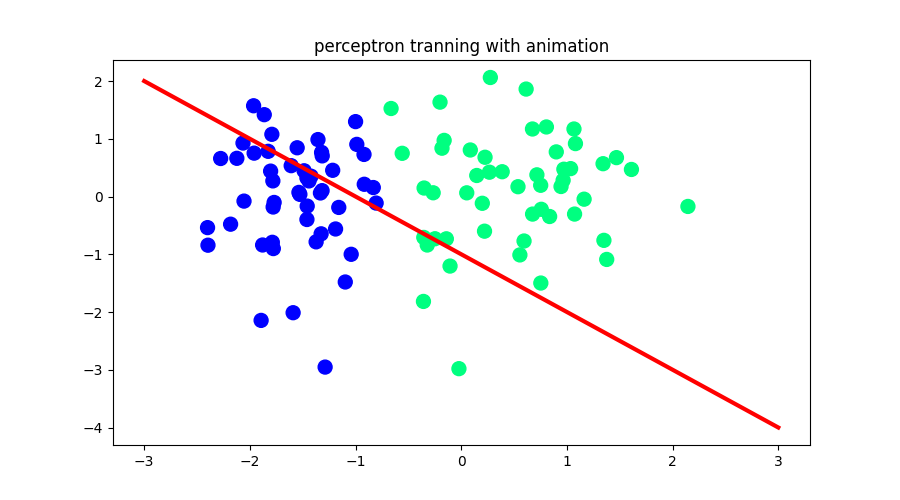

In [87]:


fig, ax = plt.subplots(figsize=(9,5))
x_i = np.linspace(start=3,stop=-3,num=100)

ax.scatter(x=X[:,0],y=X[:,1],c=y,cmap="winter",s=100)
line1, = ax.plot(x_i, x_i * m[0] + b[0],c="red",linewidth=3)
plt.title("perceptron tranning with animation")

#update funcation for animation:
def update(i):
    label = f'Epoch {i+1}'
    line1.set_ydata(x_i*m[i] + b[i]) # update line data:
    ax.set_xlabel(label)
    return line1,ax

anim = FuncAnimation(fig=fig,func=update,frames=200,interval=100)


<br>
<br>

# same code implemention instead of step funtion we will use sigmoid function: 

<br>
<br>

In [88]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Perceptron training function
def perceptron(X, y):
    m = []
    b = []
    X = np.insert(X, 0, 1, axis=1)  
    weights = np.ones(X.shape[1])  
    lr = 0.1  
    
    for i in range(1000):
        j = np.random.randint(0, 100)  
        # <------- instead of step function use sigmoid function: ---------> 
        y_hat = sigmoid(np.dot(X[j], weights))  
        weights = weights + lr * (y[j] - y_hat) * X[j]  

        m.append(-(weights[1] / weights[2]))  
        b.append(-(weights[0] / weights[2]))  
    return m, b

# Train the perceptron and store slope (m) and intercept (b) for each epoch
m, b = perceptron(X, y)

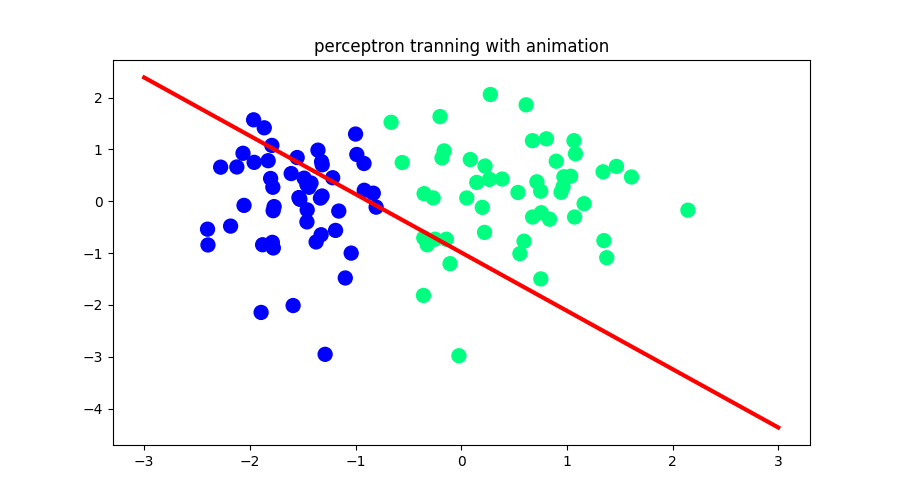

In [89]:


fig, ax = plt.subplots(figsize=(9,5))
x_i = np.linspace(start=3,stop=-3,num=100)

ax.scatter(x=X[:,0],y=X[:,1],c=y,cmap="winter",s=100)
line2, = ax.plot(x_i, x_i * m[0] + b[0],c="red",linewidth=3)
plt.title("perceptron tranning with animation")

#update funcation for animation:
def update(i):
    label = f'Epoch {i+1}'
    line2.set_ydata(x_i*m[i] + b[i]) # update line data:
    ax.set_xlabel(label)
    return line2,ax

anim = FuncAnimation(fig=fig,func=update,frames=200,interval=100)
